# Analysis Data

## Load & Read the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
full_grouped = pd.read_csv("../DATA/full_grouped.csv", sep=',')
full_grouped.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [3]:
full_grouped.shape

(35156, 10)

In [4]:
full_grouped.isnull().sum()

Date              0
Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
New cases         0
New deaths        0
New recovered     0
WHO Region        0
dtype: int64

In [5]:
full_grouped.dtypes

Date              object
Country/Region    object
Confirmed          int64
Deaths             int64
Recovered          int64
Active             int64
New cases          int64
New deaths         int64
New recovered      int64
WHO Region        object
dtype: object

### convert the columns heading to lower case.

In [6]:
full_grouped.columns = [col.strip().lower() for col in full_grouped.columns]
full_grouped.columns

Index(['date', 'country/region', 'confirmed', 'deaths', 'recovered', 'active',
       'new cases', 'new deaths', 'new recovered', 'who region'],
      dtype='object')

### convert the data to lower case.

In [7]:
obj = full_grouped.dtypes[full_grouped.dtypes == 'object'].index
full_grouped[obj] = full_grouped[obj].apply(lambda x:x.astype(str).str.lower())
full_grouped.head()

,date,country/region,confirmed,deaths,recovered,active,new cases,new deaths,new recovered,who region
0,2020-01-22,afghanistan,0,0,0,0,0,0,0,eastern mediterranean
1,2020-01-22,albania,0,0,0,0,0,0,0,europe
2,2020-01-22,algeria,0,0,0,0,0,0,0,africa
3,2020-01-22,andorra,0,0,0,0,0,0,0,europe
4,2020-01-22,angola,0,0,0,0,0,0,0,africa


### replace the columns format

In [8]:
full_grouped.columns = [col.replace(' ', '_') for col in full_grouped.columns]
full_grouped.columns

Index(['date', 'country/region', 'confirmed', 'deaths', 'recovered', 'active',
       'new_cases', 'new_deaths', 'new_recovered', 'who_region'],
      dtype='object')

### get the unique values:

In [9]:
for col in full_grouped.columns:
    print(f"{col} ---> {len(full_grouped[col].unique())}")

date ---> 188
country/region ---> 187
confirmed ---> 10732
deaths ---> 3598
recovered ---> 7649
active ---> 8440
new_cases ---> 2800
new_deaths ---> 715
new_recovered ---> 2276
who_region ---> 6


### handle the date column

In [10]:
full_grouped['month'] = full_grouped['date'].apply(lambda x:x.split('-')[1][-1])
full_grouped.head()

,date,country/region,confirmed,deaths,recovered,active,new_cases,new_deaths,new_recovered,who_region,month
0,2020-01-22,afghanistan,0,0,0,0,0,0,0,eastern mediterranean,1
1,2020-01-22,albania,0,0,0,0,0,0,0,europe,1
2,2020-01-22,algeria,0,0,0,0,0,0,0,africa,1
3,2020-01-22,andorra,0,0,0,0,0,0,0,europe,1
4,2020-01-22,angola,0,0,0,0,0,0,0,africa,1


In [11]:
full_grouped['month'].unique()

array(['1', '2', '3', '4', '5', '6', '7'], dtype=object)

In [12]:
mnt = {'1':'Jan', '2':'Feb', '3':'Mar', '4':'Apr', '5':'May', '6':'Jun', '7':'Jul'}
full_grouped['month'] = full_grouped['month'].map(mnt)
full_grouped.head()

,date,country/region,confirmed,deaths,recovered,active,new_cases,new_deaths,new_recovered,who_region,month
0,2020-01-22,afghanistan,0,0,0,0,0,0,0,eastern mediterranean,Jan
1,2020-01-22,albania,0,0,0,0,0,0,0,europe,Jan
2,2020-01-22,algeria,0,0,0,0,0,0,0,africa,Jan
3,2020-01-22,andorra,0,0,0,0,0,0,0,europe,Jan
4,2020-01-22,angola,0,0,0,0,0,0,0,africa,Jan


In [13]:
full_grouped['month'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul'], dtype=object)

### separate the data region wise:

['eastern mediterranean', 'europe', 'africa', 'americas','western pacific', 'south-east asia']

In [14]:
eastern_mediterranean_region = full_grouped[full_grouped['who_region'] == 'eastern mediterranean']
europe_region = full_grouped[full_grouped['who_region'] == 'europe']
africa_region = full_grouped[full_grouped['who_region'] == 'africa']
americas_region = full_grouped[full_grouped['who_region'] == 'americas']
western_pacific_region = full_grouped[full_grouped['who_region'] == 'western pacific']
south_east_asia_region = full_grouped[full_grouped['who_region'] == 'south-east asia']

## Perform the analysis based on "WHO Region":

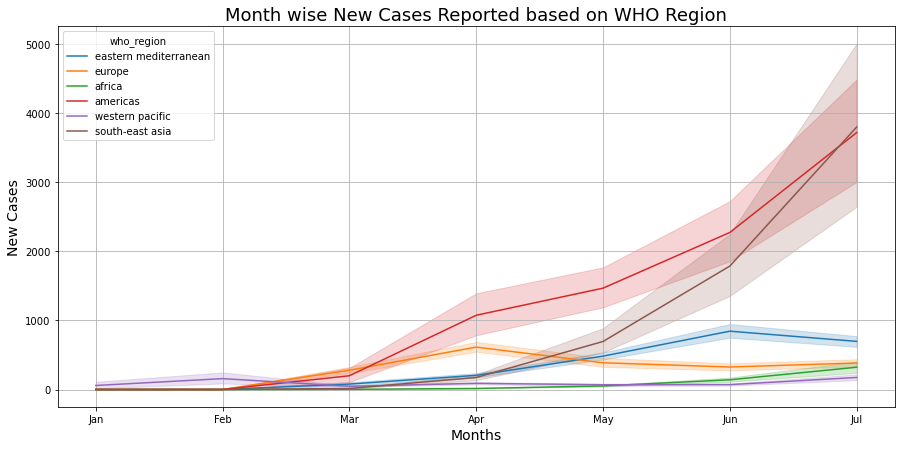

In [15]:
# plot the data: month wise new cases
plt.figure(figsize=(15,7))
plt.grid()
line_plot = sns.lineplot(data=full_grouped, x='month', y='new_cases', hue='who_region')
line_plot.set_title("Month wise New Cases Reported based on WHO Region", fontsize=18)
line_plot.set_xlabel('Months', fontsize=14)
line_plot.set_ylabel("New Cases", fontsize=14)
# plt.savefig("../Plots or Graphs Pictures/Country_wise_new_cases_reported_based_on_who_region_LineChart.png")
plt.show()

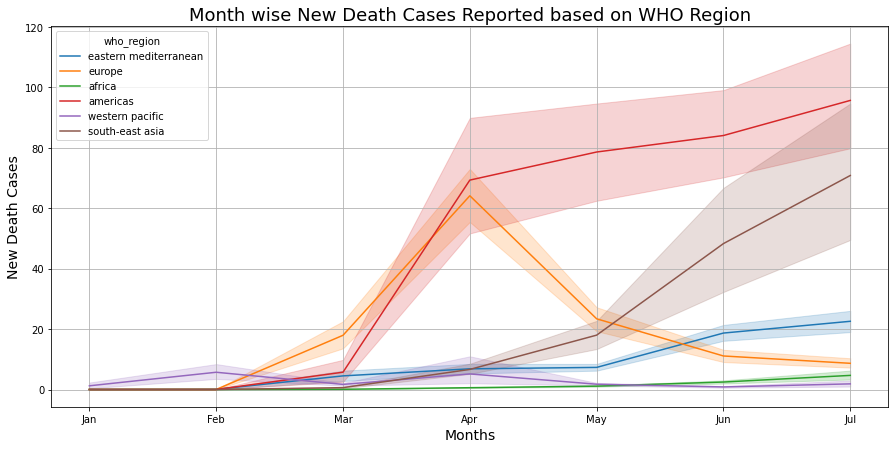

In [16]:
# plot the data: month wise new Death cases
plt.figure(figsize=(15,7))
plt.grid()
line_plot = sns.lineplot(data=full_grouped, x='month', y='new_deaths', hue='who_region')
line_plot.set_title("Month wise New Death Cases Reported based on WHO Region", fontsize=18)
line_plot.set_xlabel('Months', fontsize=14)
line_plot.set_ylabel("New Death Cases", fontsize=14)
# plt.savefig("../Plots or Graphs Pictures/Country_wise_new_death_cases_reported_based_on_who_region_LineChart.png")
plt.show()

## Perform the analysis based on top 12 countries 

India, US, China, UK, France, Brazil, Japan, Australia, Germany, Italy, Canada, Russia

### Extract the data based on top 12 countries

In [17]:
india = full_grouped[full_grouped['country/region'] == 'india']
us = full_grouped[full_grouped['country/region'] == 'us']
china = full_grouped[full_grouped['country/region'] == 'china']
uk = full_grouped[full_grouped['country/region'] == 'united kingdom']
france = full_grouped[full_grouped['country/region'] == 'france']
brazil = full_grouped[full_grouped['country/region'] == 'brazil']
japan = full_grouped[full_grouped['country/region'] == 'japan']
australia = full_grouped[full_grouped['country/region'] == 'australia']
germany = full_grouped[full_grouped['country/region'] == 'germany']
italy = full_grouped[full_grouped['country/region'] == 'italy']
canada = full_grouped[full_grouped['country/region'] == 'canada']
russia = full_grouped[full_grouped['country/region'] == 'russia']

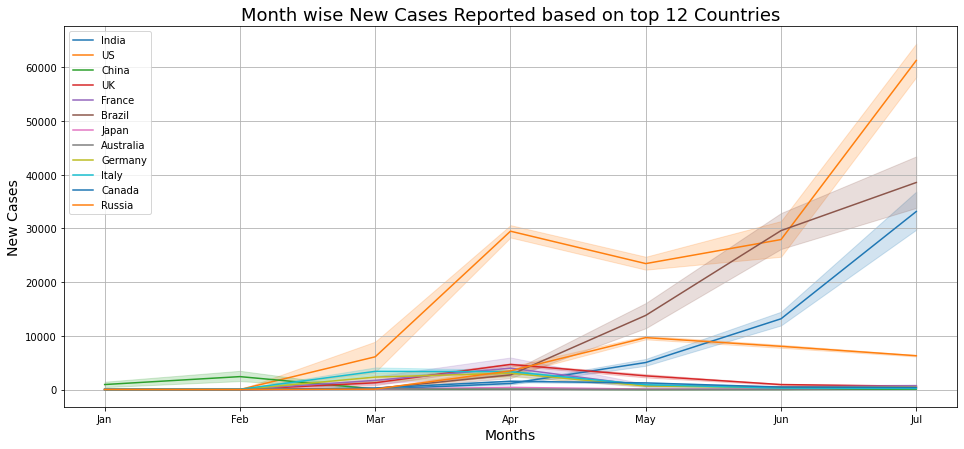

In [18]:
# plot the data: month wise new cases reported

plt.figure(figsize=(16,7))
plt.grid()
line_plot = sns.lineplot(data=india, x='month', y='new_cases') # India 
sns.lineplot(data=us, x='month', y='new_cases') # US
sns.lineplot(data=china, x='month', y='new_cases') # China
sns.lineplot(data=uk, x='month', y='new_cases') # United Kingdom
sns.lineplot(data=france, x='month', y='new_cases') # France
sns.lineplot(data=brazil, x='month', y='new_cases') # Brazil
sns.lineplot(data=japan, x='month', y='new_cases') # Japan
sns.lineplot(data=australia, x='month', y='new_cases') # Australia
sns.lineplot(data=germany, x='month', y='new_cases') # Germany
sns.lineplot(data=italy, x='month', y='new_cases') # Italy
sns.lineplot(data=canada, x='month', y='new_cases') # Canada
sns.lineplot(data=russia, x='month', y='new_cases') # Russia

plt.legend(['India', 'US', 'China', 'UK', 'France', 'Brazil', 'Japan', 'Australia', 'Germany', 'Italy', 'Canada', 'Russia'])
line_plot.set_title("Month wise New Cases Reported based on top 12 Countries", fontsize=18)
line_plot.set_xlabel('Months', fontsize=14)
line_plot.set_ylabel("New Cases", fontsize=14)
# plt.savefig("../Plots or Graphs Pictures/Country_wise_new_cases_reported_based_on_top_12_countries_LineChart.png")
plt.show()

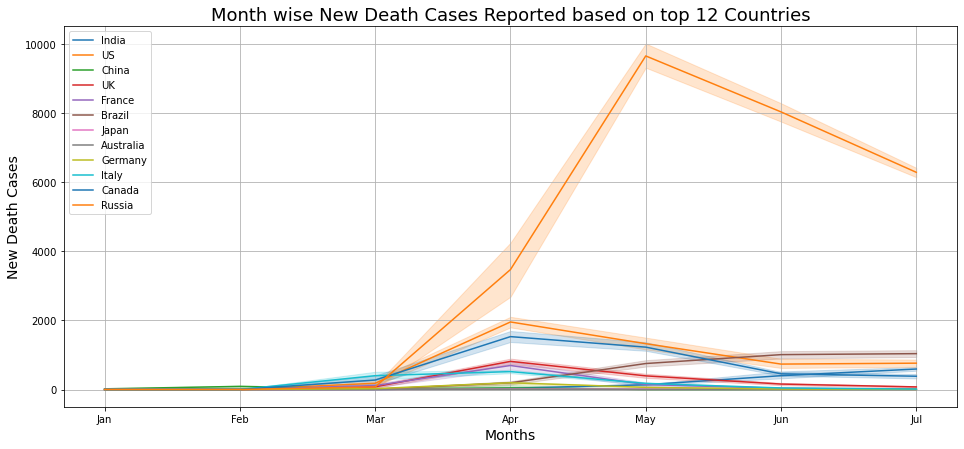

In [19]:
# plot the data: month wise new cases reported

plt.figure(figsize=(16,7))
plt.grid()
line_plot = sns.lineplot(data=india, x='month', y='new_deaths') # India 
sns.lineplot(data=us, x='month', y='new_deaths') # US
sns.lineplot(data=china, x='month', y='new_deaths') # China
sns.lineplot(data=uk, x='month', y='new_deaths') # United Kingdom
sns.lineplot(data=france, x='month', y='new_deaths') # France
sns.lineplot(data=brazil, x='month', y='new_deaths') # Brazil
sns.lineplot(data=japan, x='month', y='new_deaths') # Japan
sns.lineplot(data=australia, x='month', y='new_deaths') # Australia
sns.lineplot(data=germany, x='month', y='new_deaths') # Germany
sns.lineplot(data=italy, x='month', y='new_deaths') # Italy
sns.lineplot(data=canada, x='month', y='new_cases') # Canada
sns.lineplot(data=russia, x='month', y='new_cases') # Russia

plt.legend(['India', 'US', 'China', 'UK', 'France', 'Brazil', 'Japan', 'Australia', 'Germany', 'Italy', 'Canada', 'Russia'])
line_plot.set_title("Month wise New Death Cases Reported based on top 12 Countries", fontsize=18)
line_plot.set_xlabel('Months', fontsize=14)
line_plot.set_ylabel("New Death Cases", fontsize=14)
# plt.savefig("../Plots or Graphs Pictures/Country_wise_new_death_cases_reported_based_on_top_12_countries_LineChart.png")
plt.show()

### New Cases & New Deaths Country wise:

In [20]:
new_ = [
    {
        'country': 'India', 
        'new cases': sorted(india['new_cases'], reverse=True)[0],
        'new death cases': sorted(india['new_deaths'], reverse=True)[0],
    },
    {
        'country': 'US', 
        'new cases': sorted(us['new_cases'], reverse=True)[0],
        'new death cases': sorted(us['new_deaths'], reverse=True)[0],
    },
    {
        'country': 'China', 
        'new cases': sorted(china['new_cases'], reverse=True)[0],
        'new death cases': sorted(china['new_deaths'], reverse=True)[0],
    },
    {
        'country': 'United Kingdom', 
        'new cases': sorted(uk['new_cases'], reverse=True)[0],
        'new death cases': sorted(uk['new_deaths'], reverse=True)[0],
    },
    {
        'country': 'France', 
        'new cases': sorted(france['new_cases'], reverse=True)[0],
        'new death cases': sorted(france['new_deaths'], reverse=True)[0],
    },
    {
        'country': 'Brazil', 
        'new cases': sorted(brazil['new_cases'], reverse=True)[0],
        'new death cases': sorted(brazil['new_deaths'], reverse=True)[0],
    },
    {
        'country': 'Japan', 
        'new cases': sorted(japan['new_cases'], reverse=True)[0],
        'new death cases': sorted(japan['new_deaths'], reverse=True)[0],
    },
    {
        'country': 'Australia', 
        'new cases': sorted(australia['new_cases'], reverse=True)[0],
        'new death cases': sorted(australia['new_deaths'], reverse=True)[0],
    },
    {
        'country': 'Germany', 
        'new cases': sorted(germany['new_cases'], reverse=True)[0],
        'new death cases': sorted(germany['new_deaths'], reverse=True)[0],
    },
    {
        'country': 'Italy', 
        'new cases': sorted(italy['new_cases'], reverse=True)[0],
        'new death cases': sorted(italy['new_deaths'], reverse=True)[0],
    },
    {
        'country': 'Canada', 
        'new cases': sorted(canada['new_cases'], reverse=True)[0],
        'new death cases': sorted(canada['new_deaths'], reverse=True)[0],
    },
    {
        'country': 'Russia', 
        'new cases': sorted(russia['new_cases'], reverse=True)[0],
        'new death cases': sorted(russia['new_deaths'], reverse=True)[0],
    }
    
]
new_ = pd.DataFrame(new_)
new_

,country,new cases,new death cases
0,India,49981,2003
1,US,77255,2614
2,China,13628,1290
3,United Kingdom,5505,1173
4,France,26849,1438
5,Brazil,67860,1473
6,Japan,978,29
7,Australia,532,10
8,Germany,6933,510
9,Italy,6557,919


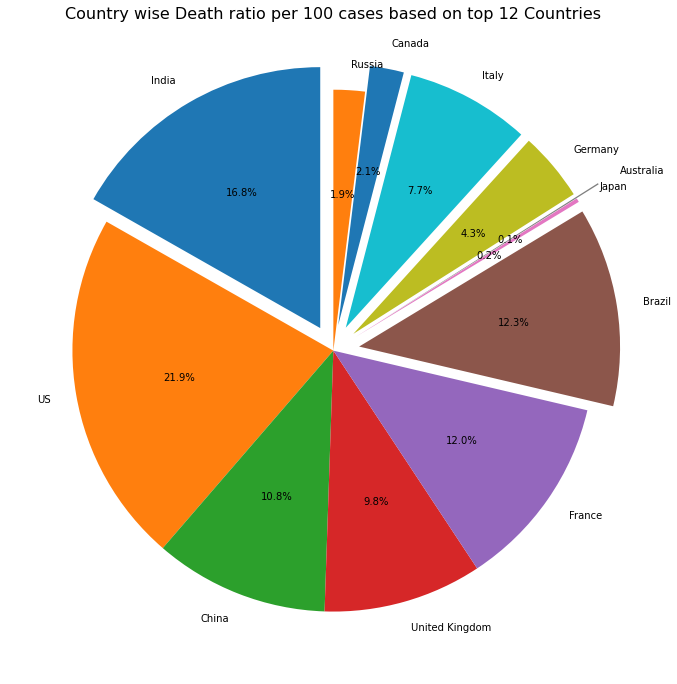

In [28]:
# Country wise Death ratio Per 100 cases:

plt.figure(figsize=(15,12))
explode = (0.1, 0, 0, 0, 0, 0.1, 0.1, 0.2, 0.1, 0.1, 0.1, 0)
plt.pie(x=new_['new death cases'], labels=new_['country'], 
        explode=explode, autopct='%1.1f%%', startangle=90)
plt.title("Country wise Death ratio per 100 cases based on top 12 Countries", fontsize=16)
plt.show()